# <span style="color:purple"> Outlier Detection

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
df= pd.read_csv('C:\\Users\\deepz\\Downloads\\house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [8]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [9]:
df.shape

(13200, 7)

<span style="color:red">***Detecting the outliers, removing it using different methods.***

## 1.MEAN METHOD

In [10]:
df.price_per_sqft.min()

267

In [11]:
df.price_per_sqft.max()

12000000

In [12]:
df.price_per_sqft.mean()

7920.336742424242

In [13]:
df.price_per_sqft.median()

5438.0

<span style='color:blue'>***There is a significant difference between mean and median. Indicating presence of outliers.***

C:\Users\deepz\AppData\Local\Temp\ipykernel_14840\3254988551.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],color='r')


Text(0.5, 1.0, 'Distribution of price per sqft with Outliers')

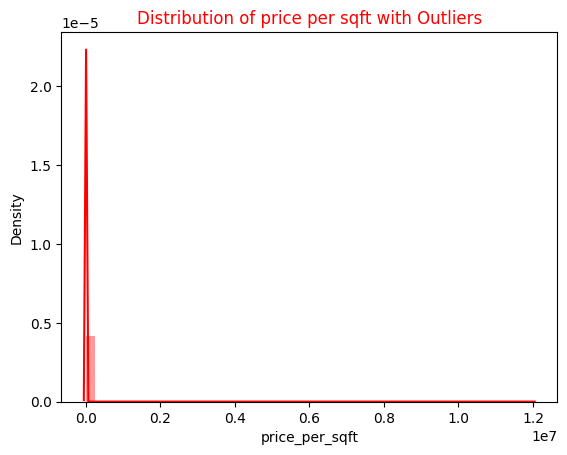

In [25]:
sns.distplot(df['price_per_sqft'],color='r')
plt.title('Distribution of price per sqft with Outliers',color='r')

<Axes: ylabel='price_per_sqft'>

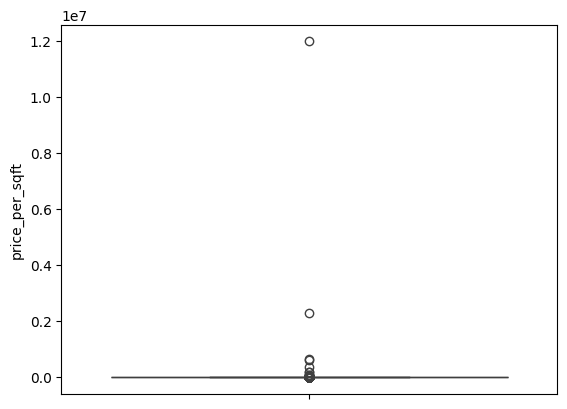

In [24]:
sns.boxplot(df['price_per_sqft'])

<span style='color:green'>***Quantile() to find out the percentiles.***

In [26]:
df.price_per_sqft.quantile([0.05,0.1,0.25,0.5,0.75,0.90,0.92,0.94,0.96,0.98,0.99])

0.05     3107.85
0.10     3500.00
0.25     4267.00
0.50     5438.00
0.75     7317.00
0.90    11666.00
0.92    12857.00
0.94    14394.80
0.96    16500.00
0.98    20000.00
0.99    23674.45
Name: price_per_sqft, dtype: float64

<span style='color:magenta'>***There is an significant variation between 98th and 99th percentile, indicating presence of outliers.***

In [27]:
df[df.price_per_sqft>df.price_per_sqft.quantile(0.95)] #outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
69,other,3 Bedroom,500.0,3.0,100.0,3,20000
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [28]:
#Data without outliers
df1=df[df.price_per_sqft<df.price_per_sqft.quantile(0.95)]
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


C:\Users\deepz\AppData\Local\Temp\ipykernel_14840\2713776560.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price_per_sqft'],color='r')


Text(0.5, 1.0, 'Distribution of Price per Sqft without outliers')

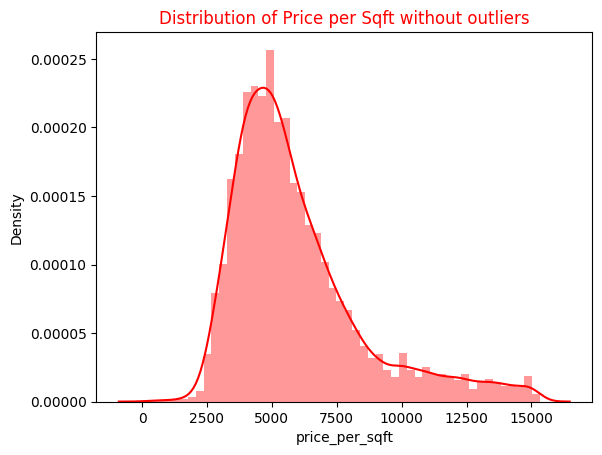

In [30]:
sns.distplot(df1['price_per_sqft'],color='r')
plt.title('Distribution of Price per Sqft without outliers',color='r')

<Axes: ylabel='price_per_sqft'>

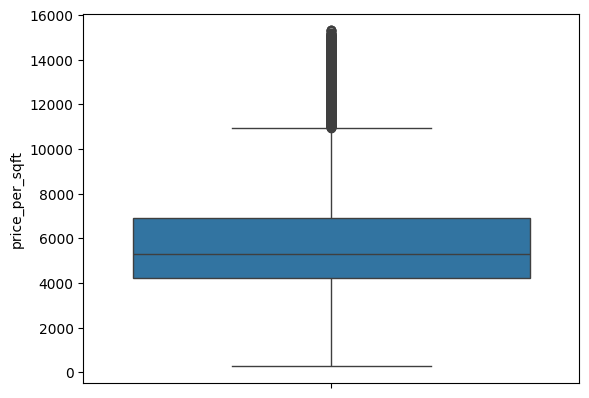

In [33]:
sns.boxplot(df1['price_per_sqft'])

In [34]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df1))
print("Outliers:",len(df)-len(df1))

Before removing outliers: 13200
After removing outliers: 12540
Outliers: 660


<span style='color:indigo'>***After removing the ouliers using the mean function,we have achieved a bell shaped curve in the distplot, and we have removed 660 ouliers from the dataset.***

## 2.PERCENTILE METHOD

In [35]:
upper_limit=df['price_per_sqft'].quantile(0.95)
lower_limit=df['price_per_sqft'].quantile(0.05)

In [36]:
print("Upper Limit:",upper_limit)
print("Lower Limit:",lower_limit)

Upper Limit: 15312.099999999984
Lower Limit: 3107.8500000000004


C:\Users\deepz\AppData\Local\Temp\ipykernel_14840\3611621828.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],color='g')


Text(0.5, 1.0, 'Distribution of Price Per Sqft with Outliers')

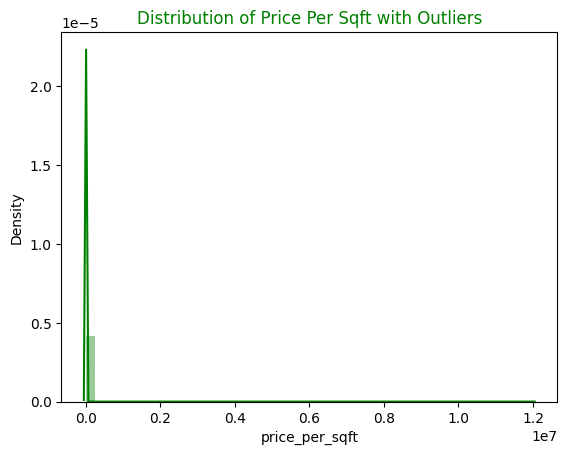

In [53]:
sns.distplot(df['price_per_sqft'],color='g')
plt.title('Distribution of Price Per Sqft with Outliers',color='g')

<Axes: ylabel='price_per_sqft'>

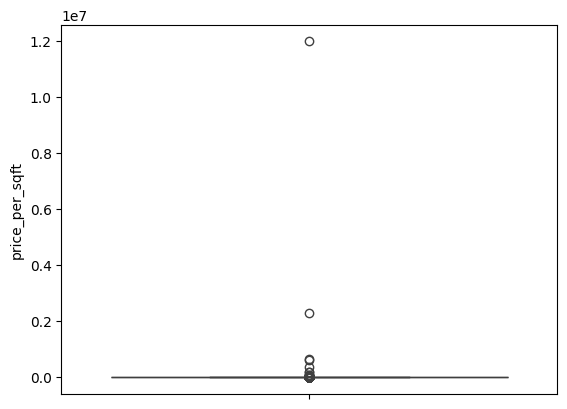

In [39]:
sns.boxplot(df['price_per_sqft'])

In [40]:
#finding outliers
df.loc[(df['price_per_sqft']>upper_limit) | (df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666


In [46]:
#deleting the outliers
df2=df.loc[(df['price_per_sqft']<=upper_limit) & (df['price_per_sqft']<=upper_limit)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [48]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df2))
print("Outliers:",len(df)-len(df2))

Before removing outliers: 13200
After removing outliers: 12540
Outliers: 660


C:\Users\deepz\AppData\Local\Temp\ipykernel_14840\1263576762.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['price_per_sqft'],color='g')


Text(0.5, 1.0, 'Distribution of Price Per Sqft without outliers')

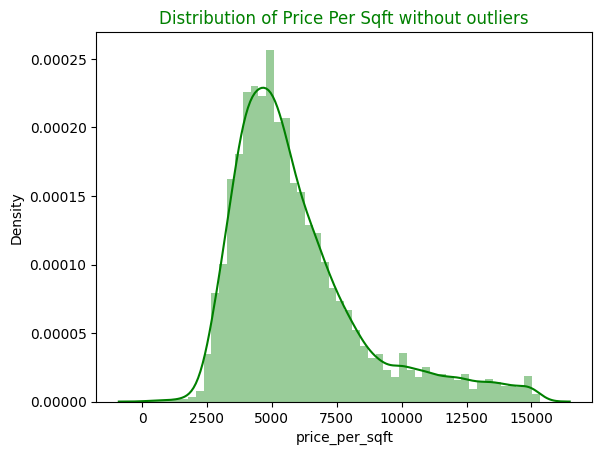

In [107]:
sns.distplot(df2['price_per_sqft'],color='g')
plt.title('Distribution of Price Per Sqft without outliers',color='g')

<Axes: ylabel='price_per_sqft'>

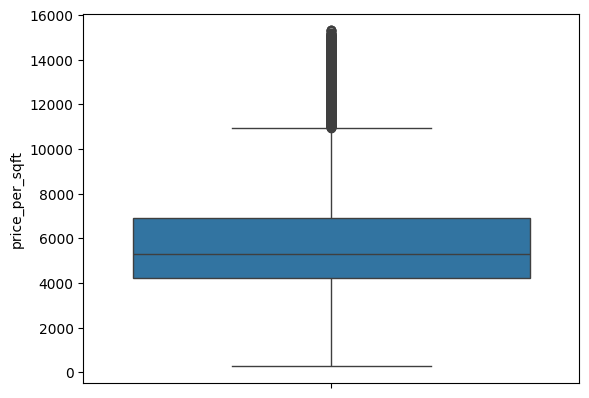

In [51]:
sns.boxplot(df2['price_per_sqft'])

<span style='color:indigo'>***After applying the percentile technique to remove outliers, our distplot nearly formed a bell curve, and we managed to get rid of 660 outliers from the dataset.***

In [54]:
#CAPPING -cahne the outliers to upper or lower values
new_df2=df.copy()
new_df2.loc[(new_df2['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit
new_df2.loc[(new_df2['price_per_sqft']<lower_limit),'price_per_sqft']=lower_limit

C:\Users\deepz\AppData\Local\Temp\ipykernel_14840\127135985.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15312.099999999984' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df2.loc[(new_df2['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit


<Axes: ylabel='price_per_sqft'>

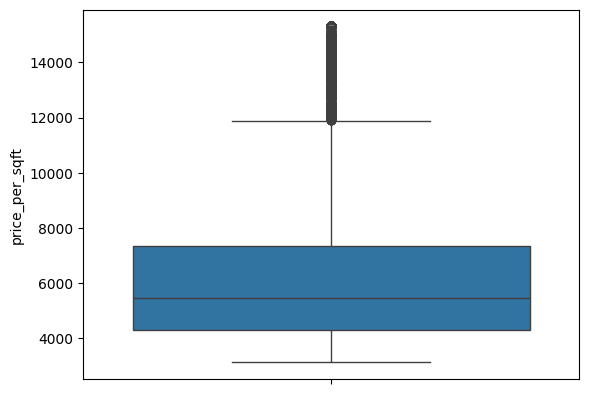

In [55]:
sns.boxplot(new_df2['price_per_sqft'])

## 3.IQR METHOD

C:\Users\deepz\AppData\Local\Temp\ipykernel_14840\373823651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


Text(0.5, 1.0, 'Distribution of price Per Sqft with outliers')

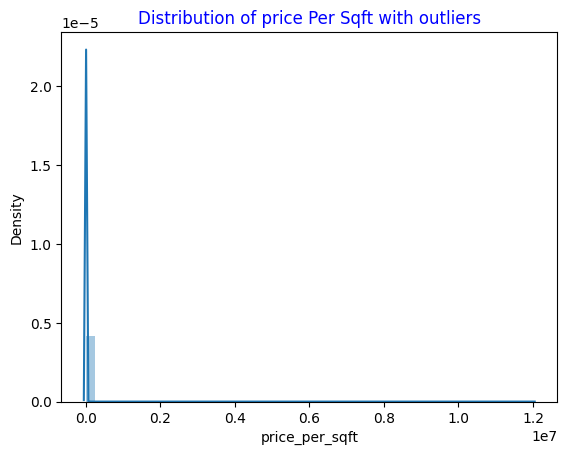

In [57]:
sns.distplot(df['price_per_sqft'])
plt.title('Distribution of price Per Sqft with outliers',color='b')

<Axes: ylabel='price_per_sqft'>

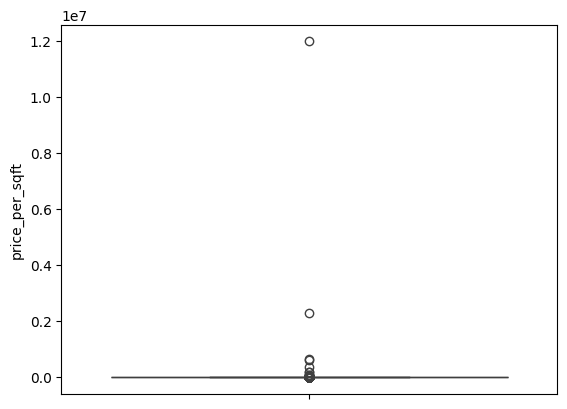

In [58]:
sns.boxplot(df['price_per_sqft'])

In [59]:
Q1=df.price_per_sqft.quantile(0.25)
Q3=df.price_per_sqft.quantile(0.75)
IQR=Q3-Q1
print("Q1=",Q1)
print("Q3=",Q3)
print("IQR=",IQR)

Q1= 4267.0
Q3= 7317.0
IQR= 3050.0


In [60]:
lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR
print('Lower Whisker=',lower_whisker)
print('Upper Whisker=',upper_whisker)

Lower Whisker= -308.0
Upper Whisker= 11892.0


In [61]:
#finding otuliers
df[(df.price_per_sqft<-308.0) | (df.price_per_sqft>11892.0)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [63]:
#df without outliers
df3=df[(df.price_per_sqft>-308.0) & (df.price_per_sqft<11892.0)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [64]:
print('Before removing outliers:',len(df))
print('After removing outliers',len(df3))
print('Outliers:',len(df)-len(df3))

Before removing outliers: 13200
After removing outliers 11935
Outliers: 1265


C:\Users\deepz\AppData\Local\Temp\ipykernel_14840\1727763733.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['price_per_sqft'],color='y')


Text(0.5, 1.0, 'Distribution of Price Per Sqft without outliers')

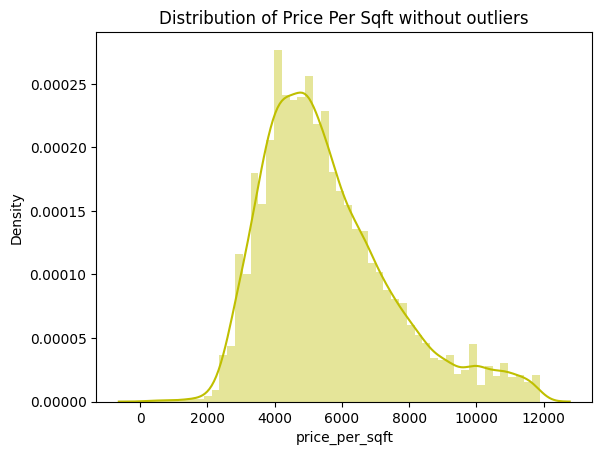

In [65]:
sns.distplot(df3['price_per_sqft'],color='y')
plt.title('Distribution of Price Per Sqft without outliers')

<Axes: ylabel='price_per_sqft'>

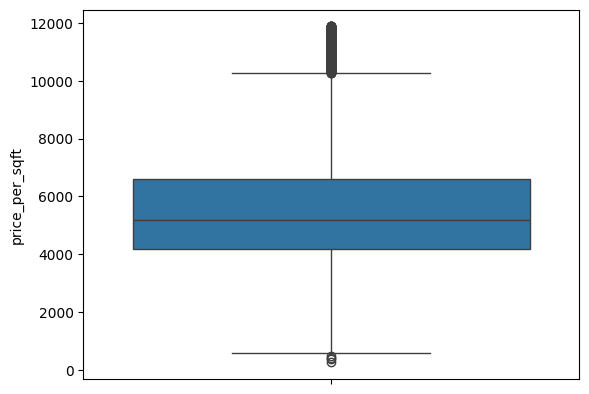

In [66]:
sns.boxplot(df3['price_per_sqft'])

<span style='color:blue'>***Using IQR method to eliminate the outliers,we approached a bell shaped curve in the distplot and removed a total of 1265 outliers  from the dataset.***

## 4.NORMAL DISTRIBUTION

In [67]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [68]:
m=df.price_per_sqft.mean()
m

7920.336742424242

In [69]:
s=df.price_per_sqft.std()
s

106727.16032810867

In [71]:
#-3sigma
m-3*s

-312261.14424190175

In [72]:
#+3sigma
m+3*s

328101.8177267502

In [74]:
#finding outliers
df[(df.price_per_sqft<-312261.14424190175) | (df.price_per_sqft>328101.8177267502)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [76]:
#data without outliers
df4=df[(df.price_per_sqft>-312261.14424190175) & (df.price_per_sqft<328101.8177267502)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [77]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df4))
print("Outliers:",len(df)-len(df4))

Before removing outliers: 13200
After removing outliers: 13195
Outliers: 5


C:\Users\deepz\AppData\Local\Temp\ipykernel_14840\4222713904.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['price_per_sqft'],color='m')


<Axes: xlabel='price_per_sqft', ylabel='Density'>

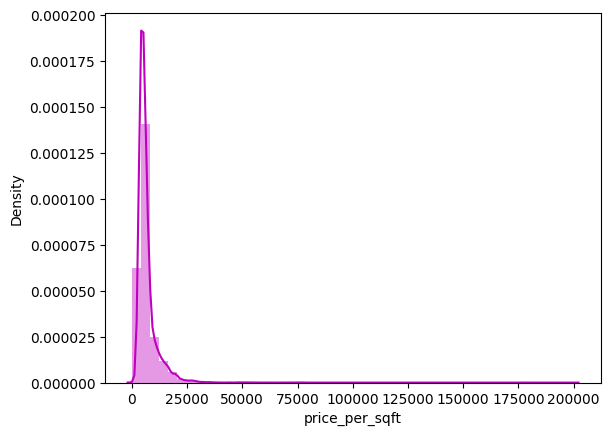

In [81]:
sns.distplot(df4['price_per_sqft'],color='m')

<Axes: ylabel='price_per_sqft'>

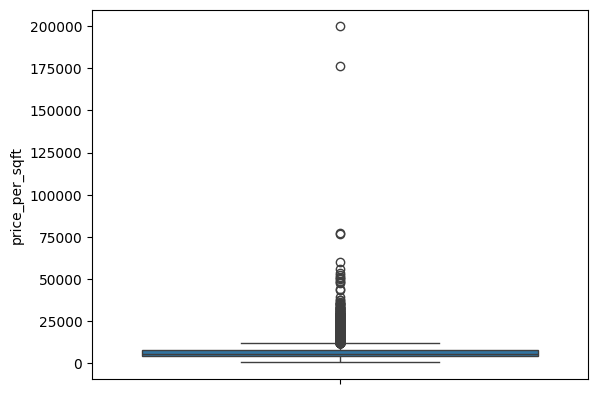

In [82]:
sns.boxplot(df4['price_per_sqft'])

<span style='color:indigo'>***Using the Normal Distributon Method, before removing outliers, there were 13200 data rows. After removing the outliers, there were 13195 data rows.5 outliers are identified.***

## 5.ZSCORE METHOD

In [83]:
m=df.price_per_sqft.mean()
m

7920.336742424242

In [85]:
s=df.price_per_sqft.std()
s

106727.16032810867

In [86]:
lower_limit=m-3*s
lower_limit

-312261.14424190175

In [87]:
upper_limit=m+3*s
upper_limit

328101.8177267502

In [88]:
#data without outliers
df5=df[(df.price_per_sqft>lower_limit) & (df.price_per_sqft<upper_limit)]
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [89]:
print("Before Removing Outliers:",len(df))
print("After Removing Outliers:",len(df5))
print("Outliers:",len(df)-len(df5))

Before Removing Outliers: 13200
After Removing Outliers: 13195
Outliers: 5


C:\Users\deepz\AppData\Local\Temp\ipykernel_14840\546888992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5['price_per_sqft'],color='b')


<Axes: xlabel='price_per_sqft', ylabel='Density'>

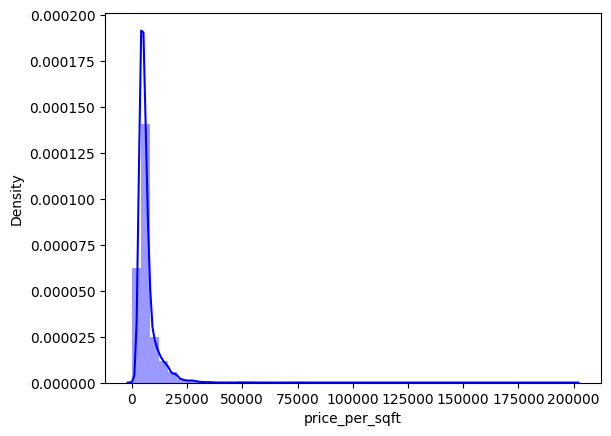

In [93]:
sns.distplot(df5['price_per_sqft'],color='b')

<Axes: ylabel='price_per_sqft'>

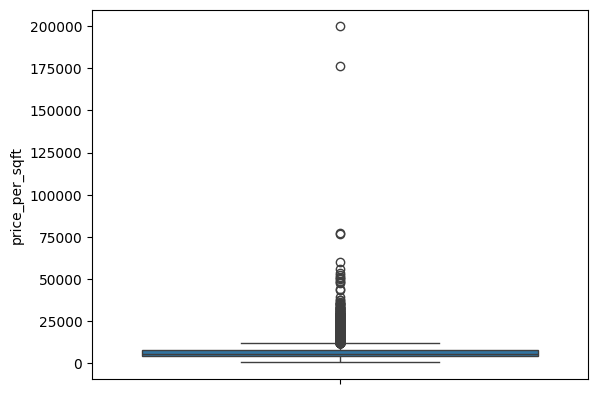

In [94]:
sns.boxplot(df5['price_per_sqft'])

<span style='color:indigo'>***using the zscore method, there were 13,200 data rows before removing outliers, and 13,195 data rows after removal, indicating a total of 5 outliers.***

<span style='color:red'>***We identified the same outliers using both the normal distribution and z-score method, indicating same process in our outlier removal approach.***

## <span style='color:green'>Correlation between all the numerical columns

In [95]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [96]:
#finding the numerical columns
#checking the dataset and selecting the numerical columns
num_col=df.select_dtypes(include=['int', 'float']).columns
num_col

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [98]:
#compute correlation mathrix
corre_matrix=df[num_col].corr()

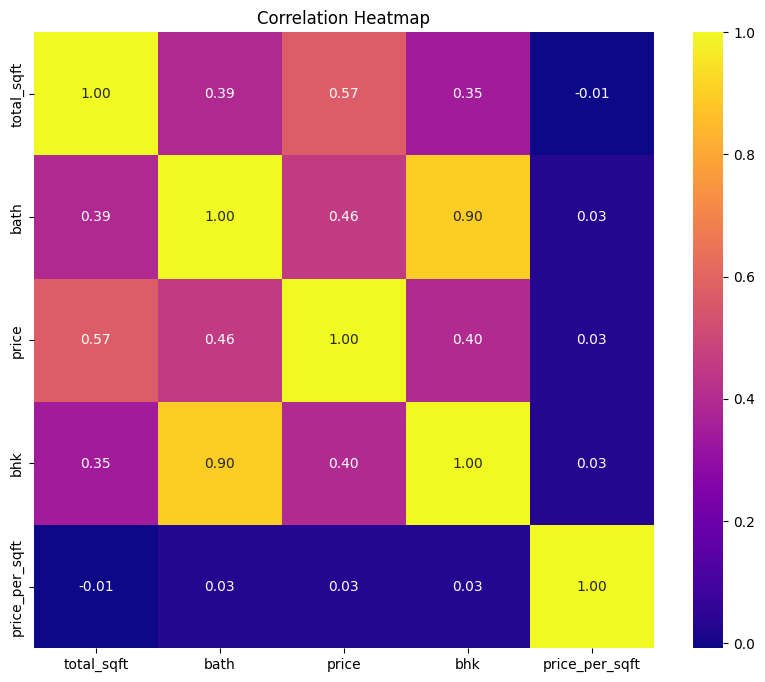

In [102]:
#plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corre_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

- <span style='color:indigo'>***Firstly, there seems to be a very weak negative correlation (-0.01) between Total Sqft and Price Per Sqft, implying that there's almost no linear relationship between these two variables.***

- <span style='color:indigo'>***However, Total Sqft shows moderate positive correlations with other key variables such as BHK (0.35), Price (0.57), and Bath (0.39), indicating that as the total square feet increases, the number of bedrooms, the property price, and the number of bathrooms tend to increase as well, though not in a perfectly linear manner.***

- <span style='color:indigo'>***Bath exhibits a strong positive correlation (0.90) with BHK, suggesting a strong linear relationship between the number of bathrooms and the number of bedrooms. Additionally, Bath also demonstrates moderate positive correlations with Price (0.46) and Total Sqft (0.39), indicating that properties with more bathrooms tend to command higher prices and have larger square feet.***

- <span style='color:indigo'>***Price also exhibits moderate positive correlations with BHK (0.40) and Total Sqft (0.57), indicating that both the number of bedrooms and the total square footage have a positive impact on property prices, though again, not in a perfectly linear manner.***

- <span style='color:indigo'>***Overall, these correlation coefficients provide valuable insights into how different factors are interrelated within our dataset, aiding in better understanding and potentially predicting property prices based on their characteristics.***

In [ ]:
#plot scatterplot
sns.pairplot(df)
plt.show()